<a href="https://colab.research.google.com/github/Martynajw42/forecasting-1-2/blob/main/Non_Seasonal_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monthly Sales Prices of Shampoo over 3 Years

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.gofplots import qqplot
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

This project aims to analyze the sales price movements of monthly shampoo sales using time series forecasting techniques. By applying models such as ARIMA, we seek to identify patterns, assess stationarity, and generate future price predictions based on historical data.

In [ ]:
df = pd.read_csv('Shampoo_Sales.csv')
df.head()

,Month,Sales
0,Jan-20,266.0
1,Feb-20,145.9
2,Mar-20,183.1
3,Apr-20,119.3
4,May-20,180.3


## Data Source & Background

The non-seasonal dataset was obtained from Kaggle, a data science competition platform and online community for data scientists and machine learning practitioners under Google LLC. The dataset contains the monthly sales prices of shampoo over a period of three (3) years from January 2020 to December 2022, 36 observations.

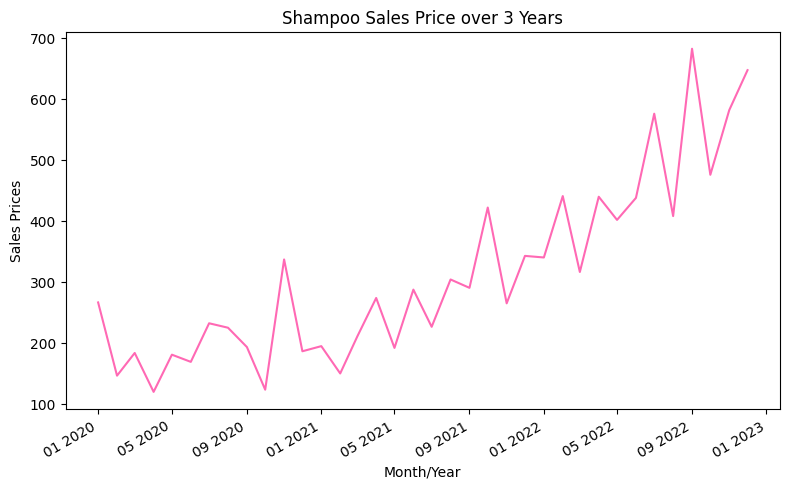

In [ ]:
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')


fig, ax = plt.subplots(figsize=(8, 5))

# Plotting the time series
fig.autofmt_xdate()
plt.plot(df['Month'], df['Sales'], color='hotpink')
plt.xlabel('Month/Year')
plt.ylabel('Sales Prices')
plt.title('Shampoo Sales Price over 3 Years')
plt.tight_layout()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m %Y'))


plt.savefig('figures.png', dpi=300)
plt.show()

## Time-Series Visualization


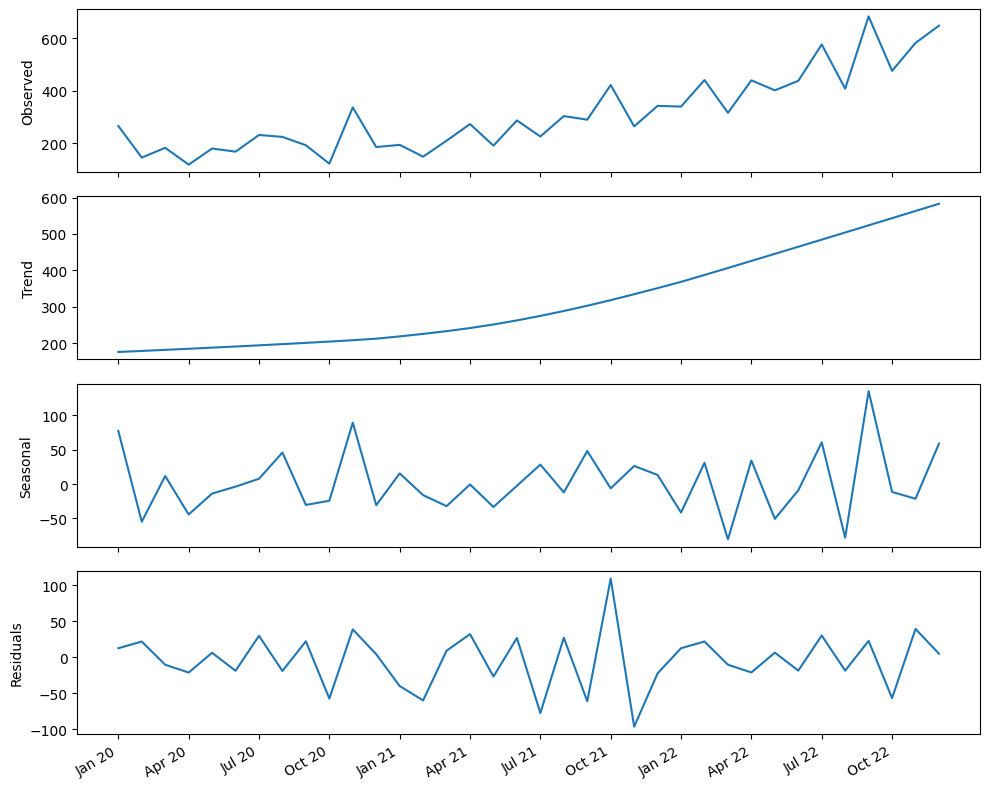

In [ ]:
decomposition = STL(df['Sales'], period=12).fit()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')

num_ticks = len(years[::3])
years = pd.date_range(start=df['Month'].min(), periods= len(df), freq='MS')
plt.xticks(np.arange(0, len(df), 3), years[::3].strftime('%b %y'))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures.png', dpi=300)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures.png', dpi=300)

We used Time Series Decomposition to separate the time series into four components: an observed component, a trend component, a seasonal component, and the residuals. The trend shows the overall direction of the time series, whether it’s increasing or decreasing over time. Here, we can see a clear upwards trend showing the increase in shampoo sale prices over time.

The seasonal component shows the repeating patterns that occur at regular intervals. In this graph, we can see that there are no seasonal cycles for shampoo sales price.

The residuals represent random fluctuations that aren’t or can’t be explained by trend or seasonality.

## Tentative Model Identification

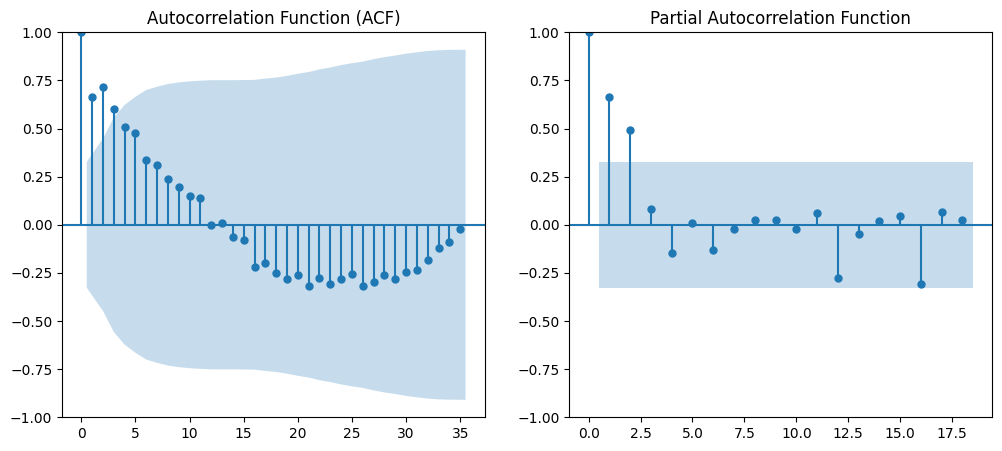

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(df['Sales'], lags=35, ax=axes[0])
plot_pacf(df['Sales'], lags=18, ax=axes[1])
axes[0].set_title('Autocorrelation Function (ACF)')
axes[1].set_title('Partial Autocorrelation Function')

plt.savefig('figures.png', dpi=300)
plt.show()

**Autocorrelation Function (ACF)**

The Autocorrelation Function (ACF) plot displays a gradual decay, with a significantly high autocorrelation at lag 1, followed by a slow tapering of values over subsequent lags. This pattern is indicative of non-stationarity in the time series data, likely due to a trend component. Such behavior suggests that the raw data requires differencing to stabilize the mean and achieve stationarity before modeling.

**Partial Autocorrelation Function (PACF)**

The PACF shows a sharp cutoff after lag 1, with the first lag exhibiting a strong partial autocorrelation, and the subsequent lags dropping near or within the confidence intervals. The sharp cutting off is typical of an autoregressive process of order 1, or AR(1).


## Next Steps

We will first need to apply differencing to make the data stationary. Then we will try ARIMA modeling: ARIMA(1,1,0) or ARIMA(2,1,0) based on PACF and need for first differencing.
